In [1]:
import tensorflow as tf
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train = X[:300,:]
X_test = X[300:,:]

y_train = y[:300]
y_test = y[300:]

### Define the computational graph

In [4]:
# initialize weights
w = tf.Variable(tf.truncated_normal([10, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [5]:
def calc(x, y):

    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))

    return [ predictions, error ]

In [10]:
y, cost = calc(X_train, y_train)

learning_rate = 0.025

epochs = 30
#epochs = 3000

points = [[], []] # You'll see later why I need this

In [11]:
y

<tf.Tensor 'Add_3:0' shape=(300, 1) dtype=float64>

In [7]:
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Run the graph

26075.035558


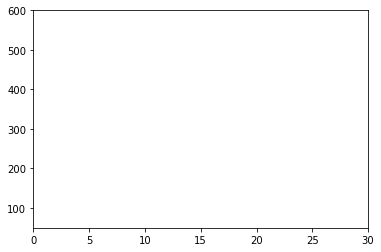

Test error = 7399.8999495 



In [9]:
with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0.:
            points[0].append(i+1)
            points[1].append(sess.run(cost))

        if i % 100 == 0:
            print(sess.run(cost))

    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()

    test_cost = calc(X_test, y_test)[1]

    print('Test error =', sess.run(test_cost), '\n')

https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py
http://web.stanford.edu/class/cs20si/lectures/notes_03.pdf
